# <b>Part 1: EDA of HemiPhysiosData</b>

https://apps.apple.com/zw/app/hemiphysiodata/id1502983547 

-----------------------------
## <b>Description on App Store</b>
-----------------------------

Harness the Power of Apple Watch: Seamlessly Gather Physical Activity and Range of Motion Data for Analytics and Machine Learning. 

 

HemiPhysioData serves as an Apple Watch app designed to gather both raw and processed data from the watch's built-in sensors, such as the accelerometer and gyroscope. Its user-friendly interface allows users to effortlessly select different activities and preferences. The collected sensor data, along with additional specified values, is then neatly stored in a CSV file. These CSV files can be easily transferred to the user's iPhone for further processing and analysis. The app is specifically tailored for individuals seeking to collect movement data or Range of Motion (ROM) measurements, with the added benefit of utilizing the data for analytics and machine learning. Users have the flexibility to choose the activity type, movement type, sampling rate (samples per second), and indicate which wrist they wear the watch on, as well as whether it's their dominant or non-dominant side. 

 
-----------------------------
## <b>Dataset</b>
-----------------------------
The following sensor data of the Apple Watch (WatchOS) is saved in the CSV file: 

- Device Motion Processed Data: roll, pitch, yaw, rotation rate x, rotation rate y, rotation rate z, gravity x, gravity y, gravity z, user acceleration x, user acceleration y, user acceleration z, quaternion x, quaternion y, quaternion z, quaternion 
- Accelerometer Raw Data: Acceleration x, y, and z


CSV File:
* **LoggingTime** - Time of each data sample
* **UID** - uUser identifier
* **RecNo** - Record Number
* **Hertz** - Sampling rate, 
* **Activity** - Move Type 
* **Wrist** - rt=right wrist; lt=left wrist
* **Side** - d=dominant; nd=non-dominant 
* **DMRoll/Pitch/Yaw** - Device Motion processed values Roll, Pitch, and Yaw
* **DMRotX/Y/Z** - Device motion processed rotation x, y, and z 
* **DMGrvX/Y/Z** - Device motion processed gravity x, y, and z  
* **DMUAccelX/Y/Z** - Device motion processed user acceleration x, y, and z. ***Excludes gravity, only includes motion.***
* **DMQuatX/Y/Z/W** - Device motion processed rotation x, y, and z 
* **AccelroX/Y/Z** - Accelerometer raw values x, y, and z    x, y, and z. ***Includes both gravity and motion components.***

In [3]:
import os
from time import time
from datetime import timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings



# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn.categorical")

**Let's get an overview of the data and prepare it for visualization**

In [5]:
# Get the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: D:\Dropbox\Work\Learning\Python\Rehab data\Sensor Data_ML scripts_Models\SensorData_HemiPhysioDataApp(Our App)\Data_in_Brief


### Load the data

In [7]:
# Storing the path of the extracted "train" folder 
#Rehab_data_dir = "C:/Users/ybenachour/Dropbox/Work/Learning/Python/Rehab data/"
Rehab_data_dir = "D:/Dropbox/Work/Learning/Python/Rehab data/"
HemiPhysioData_folder_name = "Sensor Data_ML scripts_Models/SensorData_HemiPhysioDataApp(Our App)/Data_in_Brief/"

# Loading the train data
data_train = pd.read_csv(Rehab_data_dir + HemiPhysioData_folder_name + "all_train.csv")

# Loading the test data
data_test = pd.read_csv(Rehab_data_dir + HemiPhysioData_folder_name + "all_test.csv")

# Loading the validation data
data_valid = pd.read_csv(Rehab_data_dir + HemiPhysioData_folder_name + "all_valid.csv")

# Shape of train, test, and validation data
print('Shape of train data:', data_train.shape)
print('Shape of test data:', data_test.shape)
print('Shape of test data:', data_valid.shape)

Shape of train data: (188717, 40)
Shape of test data: (101674, 40)
Shape of test data: (105043, 40)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25456\4159267285.py:13: DtypeWarning: Columns (4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,27,30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data_valid = pd.read_csv(Rehab_data_dir + HemiPhysioData_folder_name + "all_valid.csv")


In [8]:
#confirm the shape of both data sets and the ratio of classes is the same across both train and test datasets
print("{0:0.2f}% data is in training set".format((len(data_train)/(len(data_train.index)+len(data_valid.index))) * 100))
print("{0:0.2f}% data is in validation set".format((len(data_valid)/(len(data_train.index)+len(data_valid.index))) * 100))
print('==============')
print("Shape of Training set : ", data_train.shape)
print("Shape of validation set : ", data_valid.shape)
print("Shape of test set : ", data_test.shape)
print('==============')

64.24% data is in training set
35.76% data is in validation set
Shape of Training set :  (188717, 40)
Shape of validation set :  (105043, 40)
Shape of test set :  (101674, 40)


**We have 40 features for 3 datasets and 188717 observations in train data**

### Compare columns in train and test

#### Compare column names

In [12]:
train_columns = set(data_train.columns)
test_columns = set(data_test.columns)

# Columns present in train but not in test
train_not_in_test = train_columns - test_columns

# Columns present in test but not in train
test_not_in_train = test_columns - train_columns

print("Columns in train but not in test:", train_not_in_test)
print("Columns in test but not in train:", test_not_in_train)

Columns in train but not in test: set()
Columns in test but not in train: set()


#### Compare column data types

In [14]:
# Check if the data types of corresponding columns match
mismatched_types = {}
for column in train_columns.intersection(test_columns):
    if data_train[column].dtype != data_test[column].dtype:
        mismatched_types[column] = (data_train[column].dtype, data_test[column].dtype)

if mismatched_types:
    print("Mismatched column data types:")
    for col, dtypes in mismatched_types.items():
        print(f"{col}: train dtype = {dtypes[0]}, test dtype = {dtypes[1]}")
else:
    print("All columns have matching data types.")

All columns have matching data types.


#### Check for missing columns

In [16]:
missing_in_train = [col for col in data_test.columns if col not in data_train.columns]
missing_in_test = [col for col in data_train.columns if col not in data_test.columns]

print("Columns missing in train dataset:", missing_in_train)
print("Columns missing in test dataset:", missing_in_test)


Columns missing in train dataset: []
Columns missing in test dataset: []


-----------------------------
## <b>Pre Processing Data</b>
-----------------------------

In [18]:
# Looking at the first 5 records
data_train.head()

,AM,AMS,AMSW,AMW,AccelroX,AceelroY,AceelroZ,Activity,DMGrvX,DMGrvY,...,RecNo,SessionID,Side,TimeStamp,UAMS,UAMSW,UAMSWH,UAMW,UID,Wrist
0,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.867294,-0.610596,0.495010,movements,0.749148,-0.499892,...,1,20200520-2216,d,1638.190163,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt
1,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.888245,-0.619827,0.520325,movements,0.682155,-0.536821,...,2,20200520-2216,d,1638.240161,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt
2,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.937393,-0.670593,0.619308,movements,0.573524,-0.586034,...,3,20200520-2216,d,1638.290159,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt
3,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.937500,-0.681778,0.749481,movements,0.419380,-0.635377,...,4,20200520-2216,d,1638.340157,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt
4,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.882339,-0.726654,0.808838,movements,0.231280,-0.675439,...,5,20200520-2216,d,1638.390155,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt


**Observations:**

- There are **188717 observations and 40 columns** in the dataset.
- All the columns have 188717 non-null values, except **GyroX**, **GyroY**, **GyroZ** that have some missing value

In [20]:
# Let us see the info of the data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188717 entries, 0 to 188716
Data columns (total 40 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AM           188717 non-null  object 
 1   AMS          188717 non-null  object 
 2   AMSW         188717 non-null  object 
 3   AMW          188717 non-null  object 
 4   AccelroX     188717 non-null  float64
 5   AceelroY     188717 non-null  float64
 6   AceelroZ     188717 non-null  float64
 7   Activity     188717 non-null  object 
 8   DMGrvX       188717 non-null  float64
 9   DMGrvY       188717 non-null  float64
 10  DMGrvZ       188717 non-null  float64
 11  DMPitch      188717 non-null  float64
 12  DMQuatW      188717 non-null  float64
 13  DMQuatX      188717 non-null  float64
 14  DMQuatY      188717 non-null  float64
 15  DMQuatZ      188717 non-null  float64
 16  DMRoll       188717 non-null  float64
 17  DMRotX       188717 non-null  float64
 18  DMRotY       188717 non-

#### Print all the coloumns

In [22]:
# We want to see all columns
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
data_train.head()

,AM,AMS,AMSW,AMW,AccelroX,AceelroY,AceelroZ,Activity,DMGrvX,DMGrvY,DMGrvZ,DMPitch,DMQuatW,DMQuatX,DMQuatY,DMQuatZ,DMRoll,DMRotX,DMRotY,DMRotZ,DMUAccelX,DMUAccelY,DMUAccelZ,DMYaw,GyroX,GyroY,GyroZ,Hertz,LoggingTime,MoveType,RecNo,SessionID,Side,TimeStamp,UAMS,UAMSW,UAMSWH,UAMW,UID,Wrist
0,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.867294,-0.610596,0.495010,movements,0.749148,-0.499892,0.434609,0.523475,-0.295117,-0.846938,-5.551115e-17,0.442268,2.096483,0.144598,1.282162,0.881783,0.128766,-0.118439,0.073478,-2.835428,NaN,NaN,NaN,20,2020-05-20 22:16:14,el-exfl,1,20200520-2216,d,1638.190163,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt
1,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.888245,-0.619827,0.520325,movements,0.682155,-0.536821,0.496474,0.566665,-0.303562,-0.864882,1.468154e-02,0.399516,2.199939,0.181162,1.925150,1.423372,0.241062,-0.114393,0.091829,-2.881271,NaN,NaN,NaN,20,2020-05-20 22:16:14,el-exfl,2,20200520-2216,d,1638.240161,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt
2,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.937393,-0.670593,0.619308,movements,0.573524,-0.586034,0.572394,0.626155,-0.317248,-0.885966,3.551171e-02,0.336387,2.355209,0.144917,2.639169,1.953340,0.376992,-0.118343,0.151361,-2.954756,NaN,NaN,NaN,20,2020-05-20 22:16:14,el-exfl,3,20200520-2216,d,1638.290159,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt
3,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.937500,-0.681778,0.749481,movements,0.419380,-0.635377,0.648395,0.688497,-0.334062,-0.905906,5.943376e-02,0.253387,2.567473,0.034464,3.186646,2.189676,0.481591,-0.083098,0.152051,-3.061722,NaN,NaN,NaN,20,2020-05-20 22:16:14,el-exfl,4,20200520-2216,d,1638.340157,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt
4,movements_el-exfl,movements_el-exfl_d,movements_el-exfl_d_rt,movements_el-exfl_rt,0.882339,-0.726654,0.808838,movements,0.231280,-0.675439,0.700209,0.741560,-0.353671,-0.918353,8.205076e-02,0.157520,2.822574,-0.203090,3.482161,2.350137,0.610502,-0.048835,0.167590,3.088297,NaN,NaN,NaN,20,2020-05-20 22:16:14,el-exfl,5,20200520-2216,d,1638.390155,u01_movements_el-exfl_d,u01_movements_el-exfl_d_rt,u01_movements_el-exfl_d_rt_20,u01_movements_el-exfl_rt,u01,rt


### **Observations**

It appears that the columns ***AM***, ***AMS***, ***AMSW***, ***AMW***, ***UAMS***, ***UAMSW***, ***UAMSWH***, and ***UAMW*** contain concatenated strings that are derived from other columns to represent specific activity movements and sessions. Let's break down each of these columns and their possible meanings:

- **AM (Activity Movement)**:

    Contains the overall movement type. Examples: `movements_el-exfl`, `movements_sh-exfl`.
    Likely a high-level category of the activity, specifying the type of movement involving a specific body part (e.g., elbow, shoulder).

- **AMS (Activity Movement with Side)**:

    Contains the movement type with a side designation. Examples: `movements_el-exfl_d`, `movements_sh-exfl_nd`.
    Likely indicates the side of the body involved in the activity (e.g., dominant, non-dominant).

- **AMSW (Activity Movement with Side and Wrist)**:

    Contains the movement type with side and wrist designation. Examples: `movements_el-exfl_d_rt`, `movements_sh-exfl_nd_lt`.
    Likely specifies which wrist (right or left) is being used in the movement.

- **AMW (Activity Movement with Wrist)**:

    Contains the movement type with wrist designation. Examples: `movements_el-exfl_rt`, `movements_sh-exfl_lt`.
    Likely indicates the wrist involved in the activity without specifying the side of the body.

- **UAMS (User Activity Movement with Side)**:

    Concatenates the user ID with the movement type and side. Examples: `u01_movements_el-exfl_d`, `u01_movements_sh-exfl_nd`.
    Likely specifies the user performing the activity along with the movement type and side.

- **UAMSW (User Activity Movement with Side and Wrist)**:

    Concatenates the user ID with the movement type, side, and wrist. Examples: `u01_movements_el-exfl_d_rt`, `u01_movements_sh-exfl_nd_lt`.
    Likely specifies the user, the movement type, side, and which wrist is involved.

- **UAMSWH (User Activity Movement with Side, Wrist, and Hertz)**:

    Concatenates the user ID with the movement type, side, wrist, and Hertz. Examples: `u01_movements_el-exfl_d_rt_20`, `u01_movements_sh-exfl_nd_lt_100`.
    Likely specifies the user, the movement type, side, wrist, and the sampling rate (Hertz).

- **UAMW (User Activity Movement with Wrist)**:

    Concatenates the user ID with the movement type and wrist. Examples: `u01_movements_el-exfl_rt`, `u01_movements_sh-exfl_lt`.
    Likely specifies the user and the movement type with wrist involvement.

<div class="alert alert-block alert-warning">
We drop the following columns: <b>AM</b>, <b>AMS</b>, <b>AMSW</b>, <b>AMW</b>, <b>UAMS</b>, <b>UAMSW</b>, <b>UAMSWH</b>, and <b>UAMW</b>

These columns are redundant we can derive the necessary information from other columns
</div>

#### Drop unnecessary columns

In [26]:
# List of columns to drop
columns_to_drop = ['AM', 'AMS', 'AMSW', 'AMW', 'UAMS', 'UAMSW', 'UAMSWH', 'UAMW']

# Drop the columns from the DataFrame
data_train = data_train.drop(columns=columns_to_drop)

# Verify the columns are dropped
print(data_train.columns)

Index(['AccelroX', 'AceelroY', 'AceelroZ', 'Activity', 'DMGrvX', 'DMGrvY',
       'DMGrvZ', 'DMPitch', 'DMQuatW', 'DMQuatX', 'DMQuatY', 'DMQuatZ',
       'DMRoll', 'DMRotX', 'DMRotY', 'DMRotZ', 'DMUAccelX', 'DMUAccelY',
       'DMUAccelZ', 'DMYaw', 'GyroX', 'GyroY', 'GyroZ', 'Hertz', 'LoggingTime',
       'MoveType', 'RecNo', 'SessionID', 'Side', 'TimeStamp', 'UID', 'Wrist'],
      dtype='object')


**Check for Duplicates**

In [28]:
print('No of duplicates in train: {}'.format(sum(data_train.duplicated())))
print('No of duplicates in test : {}'.format(sum(data_test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


***No duplicates entries on the train dataset***

**Check for Missing values**

In [31]:
data_train.isnull().sum()

AccelroX           0
AceelroY           0
AceelroZ           0
Activity           0
DMGrvX             0
DMGrvY             0
DMGrvZ             0
DMPitch            0
DMQuatW            0
DMQuatX            0
DMQuatY            0
DMQuatZ            0
DMRoll             0
DMRotX             0
DMRotY             0
DMRotZ             0
DMUAccelX          0
DMUAccelY          0
DMUAccelZ          0
DMYaw              0
GyroX          21454
GyroY          21454
GyroZ          21454
Hertz              0
LoggingTime        0
MoveType           0
RecNo              0
SessionID          0
Side               0
TimeStamp          0
UID                0
Wrist              0
dtype: int64

In [32]:
missing_train_values = data_train.isnull().sum()
missing_test_values = data_train.isnull().sum()

# Check if there are any columns with missing values in train
if missing_train_values.any():
    print('Columns with missing values in train data:\n', missing_train_values[missing_train_values > 0])
else:
    print("No columns with missing values.")

Columns with missing values in train data:
 GyroX    21454
GyroY    21454
GyroZ    21454
dtype: int64


In [33]:
# Check if there are any columns with missing values in test
if missing_test_values.any():
    print('Columns with missing values in test data:\n', missing_test_values[missing_test_values > 0])
else:
    print("No columns with missing values.")

Columns with missing values in test data:
 GyroX    21454
GyroY    21454
GyroZ    21454
dtype: int64


**GyroX**, **GyroY**, **GyroZ** have 21454 missing value

**Let's check the unique values in each column**

In [36]:
# Checking the count of unique values in each column
data_train.nunique()

AccelroX        19460
AceelroY        17847
AceelroZ        19261
Activity            1
DMGrvX         188263
DMGrvY         188309
DMGrvZ         188392
DMPitch        188717
DMQuatW        188717
DMQuatX        188717
DMQuatY        188690
DMQuatZ        188708
DMRoll         188717
DMRotX         188544
DMRotY         188561
DMRotZ         188576
DMUAccelX      187749
DMUAccelY      187924
DMUAccelZ      186315
DMYaw          188717
GyroX               1
GyroY               1
GyroZ               1
Hertz               2
LoggingTime      1146
MoveType            3
RecNo            3002
SessionID          35
Side                2
TimeStamp      188717
UID                 3
Wrist               2
dtype: int64

- There are only one value for **GyroX**, **GyroY**, **GyroZ**, and **Activity**
- Lets check these values in train set

In [38]:
print('GyroX:', data_train['GyroX'].unique())
print('GyroY:', data_train['GyroY'].unique())
print('GyroZ:', data_train['GyroY'].unique())
print('Activity:', data_train['Activity'].unique())

GyroX: [nan  0.]
GyroY: [nan  0.]
GyroZ: [nan  0.]
Activity: ['movements']


* The column **Activity** contains only one value = movements
* The columns **GyroX**, **GyroY**, **GyroZ** have missing values or 0. It seems the gyroscopes is not working!

In [40]:
print('GyroX:', data_test['GyroX'].unique())
print('GyroY:', data_test['GyroY'].unique())
print('GyroZ:', data_test['GyroY'].unique())
print('Activity:', data_test['Activity'].unique())

GyroX: [ 0. nan]
GyroY: [ 0. nan]
GyroZ: [ 0. nan]
Activity: ['movements']


In [41]:
# Dropping the columns GyroX, GyroY, GyroZ
data_train.drop(columns = ["GyroX", "GyroY", "GyroZ"], inplace = True)

In [42]:
# Dropping the column "Activity" there is only one value = movements
data_train.drop(columns = ["Activity"], inplace = True)

In [43]:
# Dropping the column "RecNo" and "SessionId" they don't add any value
data_train.drop(columns = ["SessionID", "RecNo"], inplace = True)

**Let's print the unique value for the categorical columns**

In [45]:
unique_counts = data_train.nunique()

# Filter columns with less than 10 unique values
columns_with_few_unique_values = unique_counts[unique_counts < 10].index

# Create a dictionary to store the column names and their unique values
unique_values_dict = {}

for column in columns_with_few_unique_values:
    unique_values = data_train[column].unique()
    formatted_unique_values = ', '.join(map(str, unique_values))
    unique_values_dict[column] = [formatted_unique_values]

# Convert the dictionary to a DataFrame
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index', columns=['Unique Values'])

# Reset the index to make the DataFrame more readable
unique_values_df.reset_index(inplace=True)
unique_values_df.rename(columns={'index': 'Column Name'}, inplace=True)

# Adjust display options to avoid truncation
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
unique_values_df

,Column Name,Unique Values
0,Hertz,"20, 100"
1,MoveType,"el-exfl, sh-exfl, wr-prsu"
2,Side,"d, nd"
3,UID,"u01, u05, u04"
4,Wrist,"rt, lt"


**Observations:**

**MoveType:**

These are the common exercise and movement terminology used in activity recognition and fitness tracking

| `el-exfl` | `sh-exfl` | `wr-prsu`|
|----------|----------|----------|
|  **el**: Elbow | **sh**: Shoulder | **wr**: Wrist |
| **exfl**: Extension/Flexion | **exfl**: Extension/Flexion | **prsu**: Pronation/Supination |
| This refers to the activity involving the extension <br> and flexion of the elbow joint, such as bicep  curls or tricep extensions. | This refers to the activity involving the extension and <br> flexion of the shoulder joint, such as shoulder presses or front raises.2 | This refers to the activity involving the pronation and <br> supination of the wrist, such as turning the forearm so the palm faces up or down. |

**Side:** Dominant `d` and Non-dominant `nd`

**Hertz:** Two different frequencies: `20 Hz` and `100 Hz`.

**Wrist:** Right `rt` and Left `lt`

**UID:** Unique user ID: 3 users in the dataset `u01`, `u04`, and `u05`.

## <b>Distribution of Categorical Columns</b>

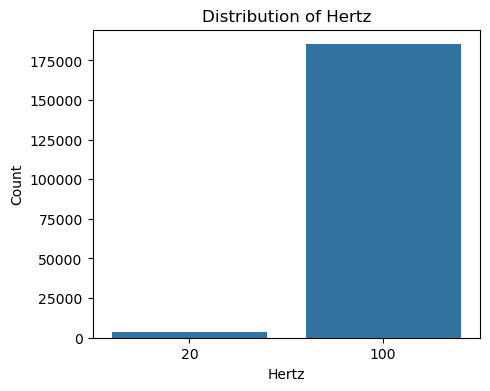

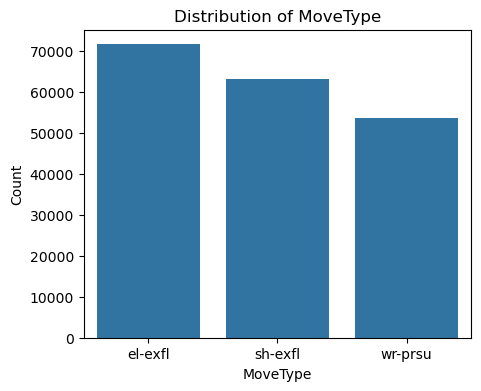

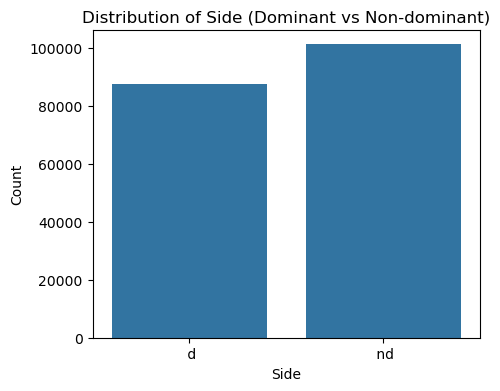

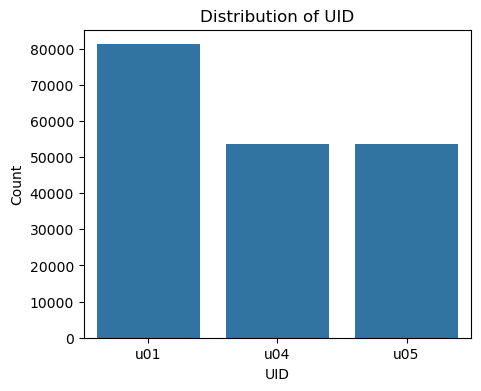

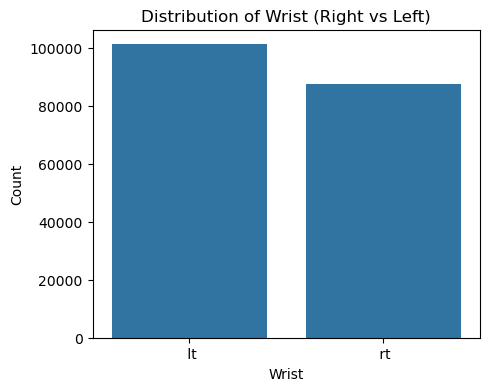

In [48]:
# Convert necessary columns to categorical types
categorical_columns = ['Hertz', 'MoveType', 'Side', 'UID', 'Wrist']
for column in categorical_columns:
    data_train[column] = data_train[column].astype('category')

# Plot the distribution of Hertz
plt.figure(figsize=(5, 4))
sns.countplot(x='Hertz', data=data_train)
plt.title('Distribution of Hertz')
plt.xlabel('Hertz')
plt.ylabel('Count')
plt.show()

# Plot the distribution of MoveType
plt.figure(figsize=(5, 4))
sns.countplot(x='MoveType', data=data_train)
plt.title('Distribution of MoveType')
plt.xlabel('MoveType')
plt.ylabel('Count')
plt.show()

# Plot the distribution of Side
plt.figure(figsize=(5, 4))
sns.countplot(x='Side', data=data_train)
plt.title('Distribution of Side (Dominant vs Non-dominant)')
plt.xlabel('Side')
plt.ylabel('Count')
plt.show()

# Plot the distribution of UID
plt.figure(figsize=(5, 4))
sns.countplot(x='UID', data=data_train)
plt.title('Distribution of UID')
plt.xlabel('UID')
plt.ylabel('Count')
plt.show()

# Plot the distribution of Wrist
plt.figure(figsize=(5, 4))
sns.countplot(x='Wrist', data=data_train)
plt.title('Distribution of Wrist (Right vs Left)')
plt.xlabel('Wrist')
plt.ylabel('Count')
plt.show()

### **Observations and Insights** ###

   **1. Hertz**
   
   - The data is recorded at two different frequencies: `20 Hz` and `100 Hz`.
   - There are more data points recorded at `100 Hz` than at `20 Hz`.
   - The higher sampling rate `100 Hz` is likely used for activities that require more precise measurements of movement, as it captures more data points per second compared to `20 Hz`.
    
   **2. MoveType**

   - The MoveType distribution shows three distinct types of movements: `el-exfl` (elbow flexion/extension), `sh-exfl` (shoulder flexion/extension), and `wr-prsu` (wrist pronation/supination).
   - `el-exfl` has the highest count, followed by `sh-exfl`, and `wr-prsu` has the lowest count.
   - Elbow flexion/extension movements are the most common in the dataset, which might indicate that the exercises or activities being monitored involve frequent use of the elbows.
   - The wrist movements are the least frequent, suggesting they might be less emphasized or less commonly recorded in the activities.
    
**3. Side (Dominant vs Non-dominant)**

- The non-dominant side `nd` has a slightly higher count than the dominant side `d`.
- The higher count for the non-dominant side might indicate a focus on exercises or activities designed to improve the strength and coordination of the weaker side, which is common in rehabilitation or balanced training programs.

**4. UID**
    
- There are three users in the dataset: `u01`, `u04`, and `u05`. 
- `u01` has the highest count, followed by `u04`, and `u05` has the lowest count.
- User `u01` has contributed the most data, which could mean that this user was monitored more frequently or over a longer period.
- The distribution suggests that the dataset is not evenly distributed among the users, which might need consideration during analysis to avoid bias.
- ***Note:User `u05` is the one with disability***

**5. Wrist (Right vs Left)**
    
- The left wrist `lt` has a higher count compared to the right wrist `rt`.
- More data is collected from the left wrist, which could be due to a preference or a focus on monitoring the non-dominant wrist (if most users are right-handed).
- This might indicate a targeted effort to gather more data on the less dominant side for comprehensive analysis.

**Lets compare the distribution of data across different categories. 
This is useful for summarizing the central tendency and dispersion of the accelerometer data for different users.**

In [51]:
unique_counts = data_train.nunique()

# Filter columns with less than 10 unique values
columns_with_few_unique_values = unique_counts[unique_counts < 10].index

# Create a dictionary to store the column names and their unique values with counts
unique_values_with_counts_dict = {}

for column in columns_with_few_unique_values:
    unique_values_counts = data_train[column].value_counts()
    unique_values_with_counts_dict[column] = unique_values_counts

# Convert the dictionary to a DataFrame
unique_values_with_counts_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values_with_counts_dict.items()]))

# Display the DataFrame
unique_values_with_counts_df

,Hertz,MoveType,Side,UID,Wrist
20,3599.0,NaN,NaN,NaN,NaN
100,185118.0,NaN,NaN,NaN,NaN
d,NaN,NaN,87514.0,NaN,NaN
lt,NaN,NaN,NaN,NaN,101203.0
nd,NaN,NaN,101203.0,NaN,NaN
rt,NaN,NaN,NaN,NaN,87514.0
el-exfl,NaN,71642.0,NaN,NaN,NaN
sh-exfl,NaN,63308.0,NaN,NaN,NaN
u01,NaN,NaN,NaN,81200.0,NaN
u04,NaN,NaN,NaN,53758.0,NaN


#### Remove Leading/Trailing Spaces and Map Values in `Side` and `Wrist`

In [53]:
# Remove leading/trailing  in Side
data_train['Side'] = data_train['Side'].str.strip()

# Remove leading/trailing spaces in Wrist
data_train['Wrist'] = data_train['Wrist'].str.strip()

In [54]:
print(data_train['Side'].unique())
print(data_train['Wrist'].unique())

['d' 'nd']
['rt' 'lt']


#### Convert `Side` to numeric (dominant = 0, non-dominant = 1)

In [56]:
# Convert Side to numeric (dominant = 0, non-dominant = 1)
side_num = {'d': 0, 'nd': 1}

data_train['Side'] = data_train['Side'].map(side_num)
print(data_train['Side'].unique())

[0 1]


#### Convert `Wrist` to numeric (rt = 0, lt = 1)

In [58]:
# Convert Wrist to numeric (rt = 0, lt = 1)
wrist_num = {'rt': 0, 'lt': 1}

data_train['Wrist'] = data_train['Wrist'].map(wrist_num)
print(data_train['Wrist'].unique())

[0 1]


In [59]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188717 entries, 0 to 188716
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   AccelroX     188717 non-null  float64 
 1   AceelroY     188717 non-null  float64 
 2   AceelroZ     188717 non-null  float64 
 3   DMGrvX       188717 non-null  float64 
 4   DMGrvY       188717 non-null  float64 
 5   DMGrvZ       188717 non-null  float64 
 6   DMPitch      188717 non-null  float64 
 7   DMQuatW      188717 non-null  float64 
 8   DMQuatX      188717 non-null  float64 
 9   DMQuatY      188717 non-null  float64 
 10  DMQuatZ      188717 non-null  float64 
 11  DMRoll       188717 non-null  float64 
 12  DMRotX       188717 non-null  float64 
 13  DMRotY       188717 non-null  float64 
 14  DMRotZ       188717 non-null  float64 
 15  DMUAccelX    188717 non-null  float64 
 16  DMUAccelY    188717 non-null  float64 
 17  DMUAccelZ    188717 non-null  float64 
 18  DMYa

## <b>Distribution of Numerical Columns

### **Summary Statistics**

Generate summary statistics for numerical columns to understand their distributions.

In [62]:
# Summary statistics for numerical column
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
AccelroX,188717.0,0.094189,0.574687,-0.948120,-0.232788,-0.136963,0.752609,1.419174
AceelroY,188717.0,0.109487,0.659717,-1.283493,-0.461670,0.084763,0.632309,1.323349
AceelroZ,188717.0,-0.000400,0.519614,-1.073853,-0.355316,-0.097763,0.469849,1.745163
DMGrvX,188717.0,0.069955,0.591590,-1.000000,-0.307042,-0.092197,0.681134,0.999999
DMGrvY,188717.0,0.025095,0.614122,-0.999992,-0.530236,0.095848,0.530809,0.999985
DMGrvZ,188717.0,0.042633,0.515306,-0.999991,-0.302634,0.039766,0.450294,0.999636
DMPitch,188717.0,-0.026464,0.742402,-1.565349,-0.559555,-0.095996,0.558879,1.566875
DMQuatW,188717.0,0.375632,0.475200,-0.987221,0.176340,0.504910,0.736997,0.999965
DMQuatX,188717.0,-0.307141,0.575794,-0.994716,-0.799190,-0.521203,0.204767,0.986582
DMQuatY,188717.0,0.022689,0.308106,-0.977826,-0.120688,-0.015491,0.147207,0.895638


### <b>Noise Handling</b>

Before ploting the box plots, we need to:
- Convert TimeStamp to datetime: Ensure the TimeStamp column is in the correct datetime format.
- Set TimeStamp as index: Set the TimeStamp column as the index of the DataFrame, which is necessary for resampling.
- Normalize numeric columns: If not already done, normalize the numeric columns to ensure consistent analysis.
- Resample the data: Resample the data to get the mean values for every second.
- Forward fill categorical columns: Fill the missing values in categorical columns using the forward fill method to ensure continuity.

In [65]:
# Convert LoggingTime to datetime
data_train['LoggingTime'] = pd.to_datetime(data_train['LoggingTime'])

# Check the data type of the LoggingTime column to ensure conversion
print('LoggingTime data type:', data_train['LoggingTime'].dtype)

LoggingTime data type: datetime64[ns]


In [66]:
# Sort the data by LoggingTime
data_train = data_train.sort_values(by='LoggingTime')

# Verify the conversion and the sorting
print(data_train[['LoggingTime']].head())

              LoggingTime
26311 2020-04-13 18:04:18
26343 2020-04-13 18:04:18
26344 2020-04-13 18:04:18
26345 2020-04-13 18:04:18
26346 2020-04-13 18:04:18


In [67]:
# Assuming the first entry's LoggingTime is the reference start time
reference_time = data_train['LoggingTime'].iloc[0]

# Convert the fractional seconds to datetime
data_train['TimeStamp'] = data_train['TimeStamp'].apply(lambda x: reference_time + timedelta(seconds=x))

# Verify the conversion
print(data_train[['TimeStamp', 'LoggingTime']].head())

                       TimeStamp         LoggingTime
26311 2020-04-14 05:34:23.771169 2020-04-13 18:04:18
26343 2020-04-14 05:34:24.093271 2020-04-13 18:04:18
26344 2020-04-14 05:34:24.103336 2020-04-13 18:04:18
26345 2020-04-14 05:34:24.113402 2020-04-13 18:04:18
26346 2020-04-14 05:34:24.123468 2020-04-13 18:04:18


## <b> Data provided by each user</b>

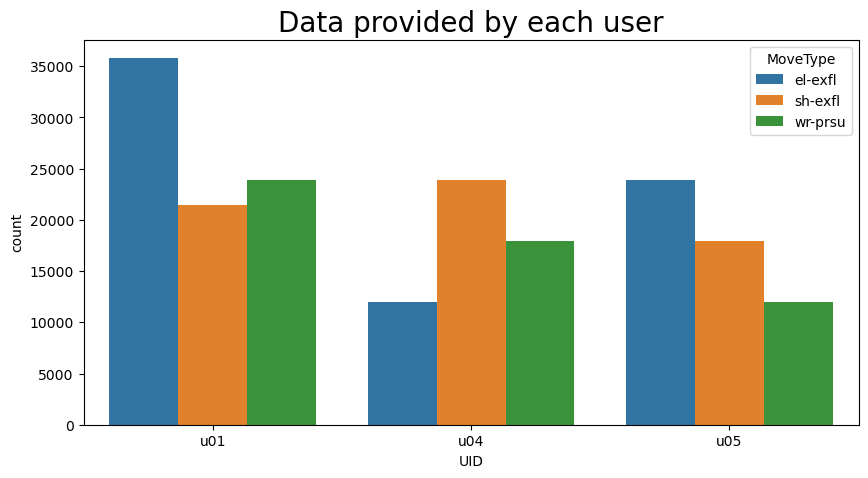

In [117]:
plt.figure(figsize=(10,5))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='UID',hue='MoveType', data = data_train)
plt.show()

User `u01` have more data recorded compared to the other users

## <b>No of Datapoints per Activity</b>

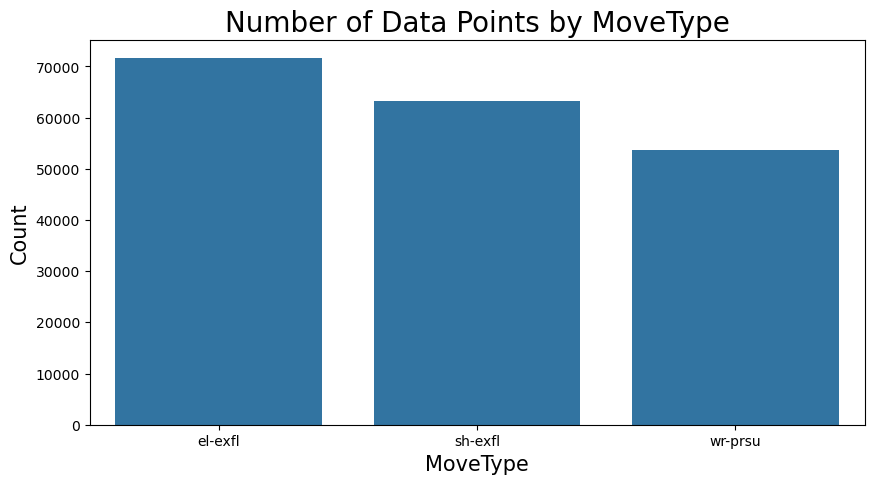

In [120]:
plt.figure(figsize=(10,5))
plt.title('Number of Data Points by MoveType', fontsize=20)
sns.countplot(x='MoveType', data=data_train)
plt.xlabel('MoveType', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

We can see that we have more data recorded with Elbow and the least movement recorded are from the wirst

### **Rotation (X, Y, Z)** ###

NameError: name 'resampled_data' is not defined

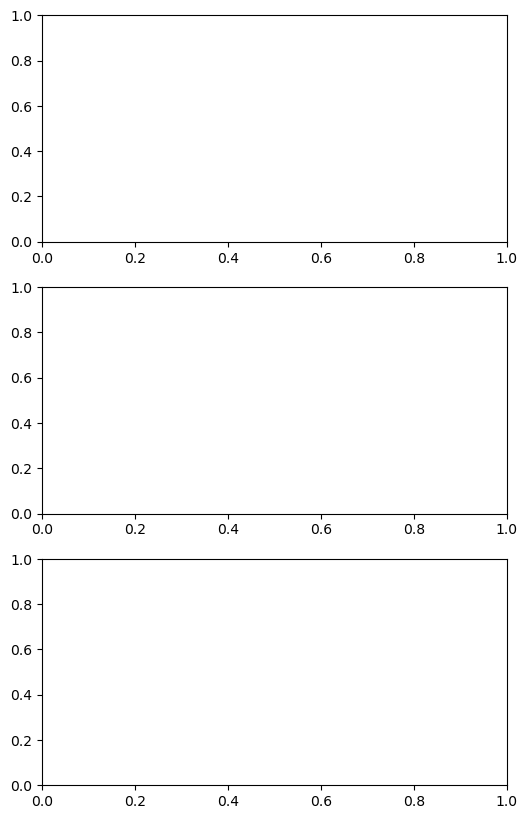

In [123]:
# Plotting box plots for accelerometer data over the selected time window for all users
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 10))

sns.boxplot(x='UID', y='DMRotX', data=resampled_data, ax=axes[0])
axes[0].set_title('Box Plot of DMRotX for All Users')
axes[0].set_xlabel('User ID')
axes[0].set_ylabel('Rotation (rad/s)')

sns.boxplot(x='UID', y='DMRotX', data=resampled_data, ax=axes[1])
axes[1].set_title('Box Plot of DMRotY for All Users')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Rotation (rad/s)')

sns.boxplot(x='UID', y='AceelroZ', data=resampled_data, ax=axes[2])
axes[2].set_title('Box Plot of DMRotZ for All Users')
axes[2].set_xlabel('User ID')
axes[2].set_ylabel('Rotation (rad/s)')

plt.tight_layout()
plt.show()

### **Rotation (Roll, Pitch, and Yaw)** ###

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 10))

sns.boxplot(x='UID', y='DMPitch', data=resampled_data, ax=axes[0])
axes[0].set_title('Box Plot of DMPitch for All Users')
axes[0].set_xlabel('User ID')
axes[0].set_ylabel('Pitch (rad/s)')

sns.boxplot(x='UID', y='DMRoll', data=resampled_data, ax=axes[1])
axes[1].set_title('Box Plot of DMRoll for All Users')
axes[1].set_xlabel('User ID')
axes[1].set_ylabel('Roll (rad/s)')

sns.boxplot(x='UID', y='DMYaw', data=resampled_data, ax=axes[2])
axes[2].set_title('Box Plot of DIMYaw for All Users')
axes[2].set_xlabel('User ID')
axes[2].set_ylabel('Yaw (rad/s)')

plt.tight_layout()
plt.show()

## <b>Noise Handling</b>

### **3. Encode categorical variables**

#### Encode 'MoveType' column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Check unique values in the 'MoveType' column
print("Unique values in MoveType column before encoding:", data_train['MoveType'].unique())

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'MoveType' column
data_train['MoveType_encoded'] = label_encoder.fit_transform(data_train['MoveType'])

# Check the mapping of original values to encoded values
print("Mapping of original values to encoded values:")
for original, encoded in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{original}: {encoded}")

#### Create a new numeric column `Target` based on the UID
* This column will be used to train the ML model.
* It will have `0` for patients without hemiparesis and `1` for patients with_hemiparesis.

In [ ]:
# Define the mapping
uid_num = {'u01': 0, 'u04': 0, 'u05': 1}

# Apply the mapping to create a new column
data_train['Target'] = data_train['UID'].map(uid_num)

# Verify the changes
print(data_train['Target'].unique())

In [ ]:
#### Plot distribution of target variable
sns.countplot(x='Target', data=data_train)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

***The data are imbalanced.***

#### Drop the columns after Encoding `MoveType`, `UID`, `Hertz` and `LoggingTime`

In [ ]:
#### Drop the column 'UID'
data_train.drop('UID', axis=1, inplace=True)

In [ ]:
#### Drop the column 'MoveType'
data_train.drop('MoveType', axis=1, inplace=True)

In [ ]:
#### Drop the column 'LoggingTime'
data_train.drop('LoggingTime', axis=1, inplace=True)

In [ ]:
#### Drop the column 'Hertz'
data_train.drop('Hertz', axis=1, inplace=True)

In [ ]:
data_train.head()

### **4. Normalize/Standardize the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numeric columns for normalization
numeric_columns = ['AccelroX', 'AceelroY', 'AceelroZ', 'DMGrvX', 'DMGrvY', 'DMGrvZ', 'DMPitch', 'DMQuatW', 'DMQuatX', \
                   'DMQuatY', 'DMQuatZ', 'DMRoll', 'DMRotX', 'DMRotY', 'DMRotZ', 'DMUAccelX', 'DMUAccelY', 'DMUAccelZ', 'DMYaw']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
data_train[numeric_columns] = scaler.fit_transform(data_train[numeric_columns])

In [ ]:
data_train.head()

## <b>Preprocessing on test data</b>

In [ ]:
# Drop the columns from the DataFrame
data_test = data_test.drop(columns=columns_to_drop)

In [ ]:
# Dropping the columns GyroX, GyroY, GyroZ
data_test.drop(columns = ["GyroX", "GyroY", "GyroZ"], inplace = True)

In [ ]:
# Dropping the column "Activity" there is only one value = movements
data_test.drop(columns = ["Activity"], inplace = True)

In [ ]:
# Dropping the column "RecNo" and "SessionId" they don't add any value
data_test.drop(columns = ["SessionID", "RecNo"], inplace = True)

In [ ]:
# Remove leading/trailing  in Side
data_test['Side'] = data_test['Side'].str.strip()

In [ ]:
# Remove leading/trailing spaces in Wrist
data_test['Wrist'] = data_test['Wrist'].str.strip()

In [ ]:
# Convert Side to numeric (dominant = 0, non-dominant = 1)
side_num = {'d': 0, 'nd': 1}
data_test['Side'] = data_test['Side'].map(side_num)

In [ ]:
# Convert Wrist to numeric (rt = 0, lt = 1)
wrist_num = {'rt': 0, 'lt': 1}
data_test['Wrist'] = data_test['Wrist'].map(wrist_num)

In [ ]:
# Fit and transform the 'MoveType' column
data_test['MoveType_encoded'] = label_encoder.fit_transform(data_test['MoveType'])

In [ ]:
# Create a new numeric column Target based on the UID
# Define the mapping
uid_num = {'u01': 0, 'u04': 0, 'u05': 1}
# Apply the mapping to create a new column
data_test['Target'] = data_test['UID'].map(uid_num)

In [ ]:
#### Drop the column 'UID'
data_test.drop('UID', axis=1, inplace=True)

In [ ]:
#### Drop the column 'MoveType'
data_test.drop('MoveType', axis=1, inplace=True)

In [ ]:
#### Drop the column 'LoggingTime'
data_test.drop('LoggingTime', axis=1, inplace=True)

In [ ]:
#### Drop the column 'Hertz'
data_test.drop('Hertz', axis=1, inplace=True)

In [ ]:
# Fit and transform the numeric columns
data_test[numeric_columns] = scaler.fit_transform(data_test[numeric_columns])

In [ ]:
data_test.head()

In [ ]:
train_columns = set(data_train.columns)
test_columns = set(data_test.columns)

# Columns present in train but not in test
train_not_in_test = train_columns - test_columns

# Columns present in test but not in train
test_not_in_train = test_columns - train_columns

print("Columns in train but not in test:", train_not_in_test)
print("Columns in test but not in train:", test_not_in_train)

In [ ]:
#### Drop the column 'TimeStamp'
data_test.drop('TimeStamp', axis=1, inplace=True)

## <b>Save the cleaned data</b>

In [ ]:
# Define the directory path
dir_path = 'data_cleaned'

# Check if the directory exists, if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    
### Save the cleaned data
data_train.to_csv('data_cleaned/train_cleaned.csv', index=False)
data_test.to_csv('data_cleaned/test_cleaned.csv', index=False)